 
# Project: Investigate a Dataset (patients no_shwo project)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# 1) Introduction:

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## 2) Data Wrangling
1-Assessing data

In [2]:
#load data and show the first 5 rows of it
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there are no missing value, and the data type is correct.

In [4]:
df.duplicated().sum()

0

no dublicated rows in the data .

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null value exciting.

In [6]:
df.PatientId.nunique()

62299

Number of unique patient:62299

In [7]:
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patient have the same result of no_show .

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the min age =-1 which is wrong so i will clean it .

2-cleaning data

In [9]:
df.rename(columns= lambda x: x.strip().lower(),inplace=True)
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

make all columns letter in lowercase to make it easy to mention.
rename no-show colummn to no_show

In [10]:
m=df.query('age==-1')
m

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
df.drop(index=99832,inplace=True)

In [12]:
#removing duplicates id with same result for no_show,that meann that we will leave duplicatte id witth different no_show result. 
df.drop_duplicates(['patientid','no_show'],inplace=True)

In [13]:
df=df.drop(['patientid','appointmentid','scheduledday','appointmentday'],axis=1)
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## 3)Exploratory Data Analysis

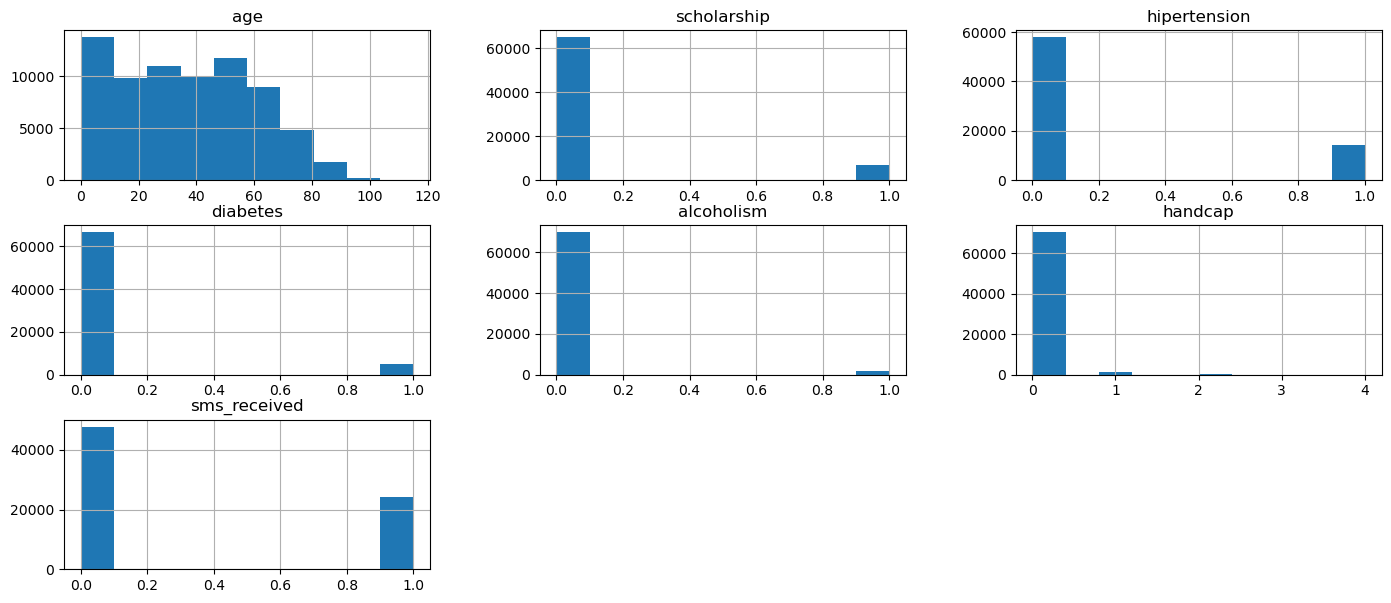

In [14]:
#general loock 
df.hist(figsize=(17,7));

In [15]:
#split the no-show column into two new dataffram ,
#one have all the data for attending patientts and
#the second one have data for non attending patients

attend=df.no_show =="No"
no_attend=df.no_show =="Yes"

# -does age effect attending?

Text(0, 0.5, 'patients number')

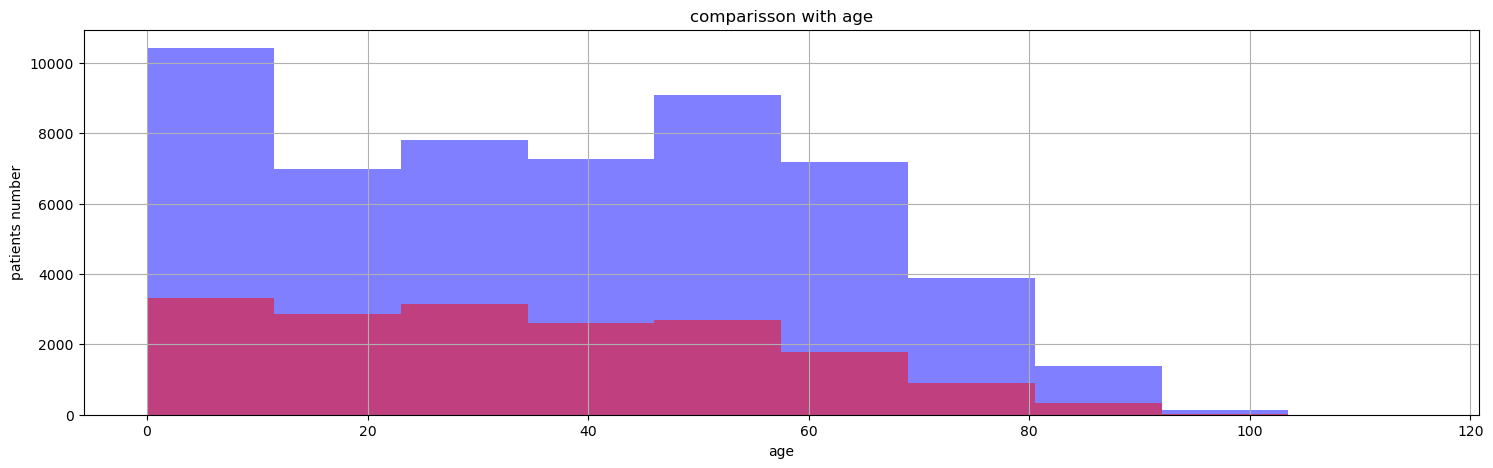

In [16]:
plt.figure(figsize=[18,5])
df['age'][attend].hist(alpha=.5,bins=10,color='blue')
df['age'][no_attend].hist(alpha=.5,bins=10,color='red')
plt.title('comparisson with age')
plt.xlabel('age')
plt.ylabel('patients number')

from the graph we can see younger people attend more than older people
so the age affect patient showing up for their scheduled appointment.

<Figure size 1400x600 with 0 Axes>

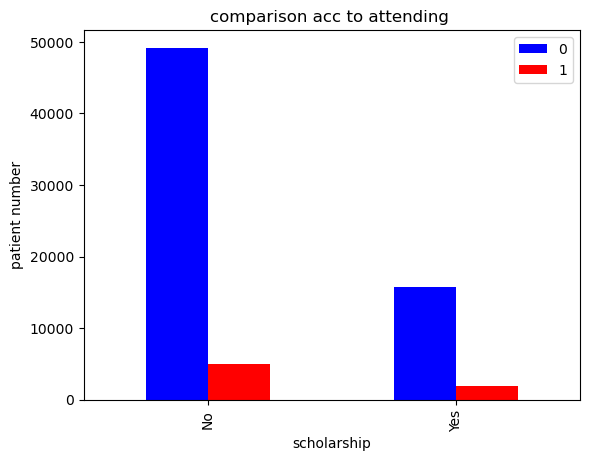

In [17]:
# does age and patients have scholership effect attending ?
def visit(df,col_name):
    plt.figure(figsize=[14,6])
    df.groupby(col_name)['no_show'].value_counts().unstack(col_name).plot(kind='bar',color=['b','r'])   
    plt.title('comparison acc to attending ')
    plt.xlabel(col_name)
    plt.ylabel('patient number')
    plt.legend();
visit(df,'scholarship')

theire are no correlation between scholership and showing.

# - does receiving sms affect attending

<Figure size 1400x600 with 0 Axes>

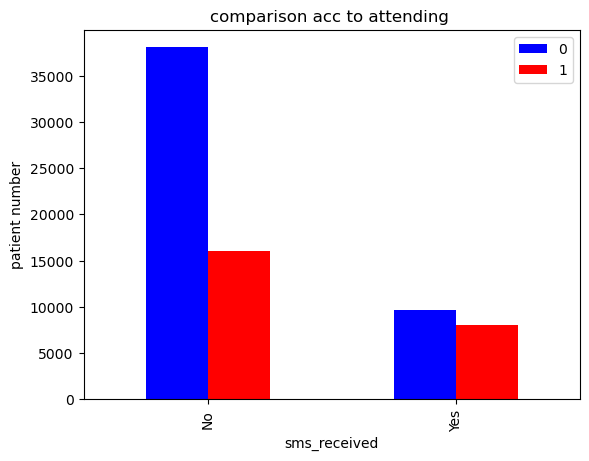

In [18]:
visit(df,'sms_received')

number of showing for not received sms  is greater than received , so received sms does not effect attend and we should review sms campain.

# - does neighborhood effect attending?

Text(0, 0.5, 'patient number')

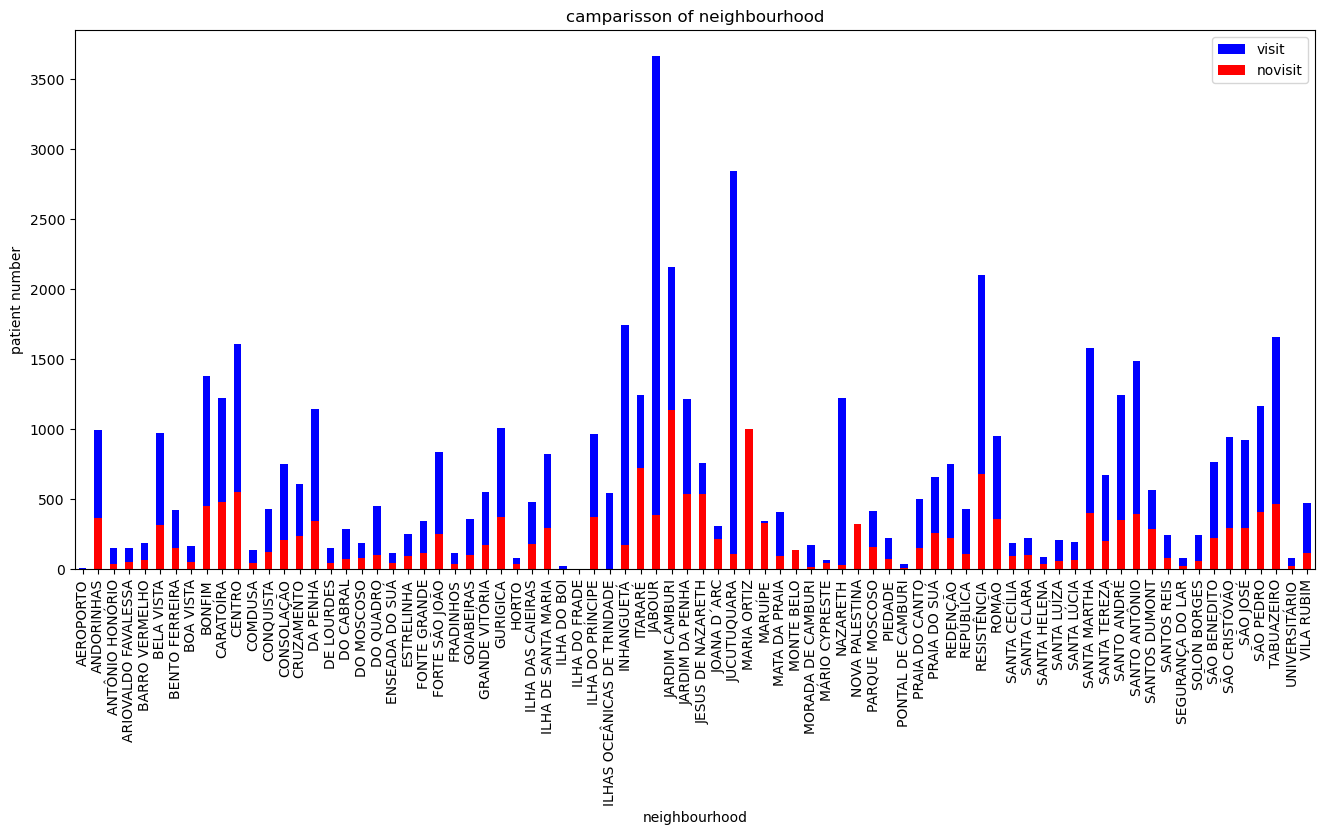

In [19]:
plt.figure(figsize=[16,7])
df[attend].groupby('neighbourhood').count().age.plot(kind='bar',color='blue',label='visit')
df[no_attend].groupby('neighbourhood').count().age.plot(kind='bar',color='red',label='novisit')
plt.legend();
plt.title('camparisson of neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('patient number')

Neighborhood has an effect on number of people attending.

Text(0, 0.5, 'patient number')

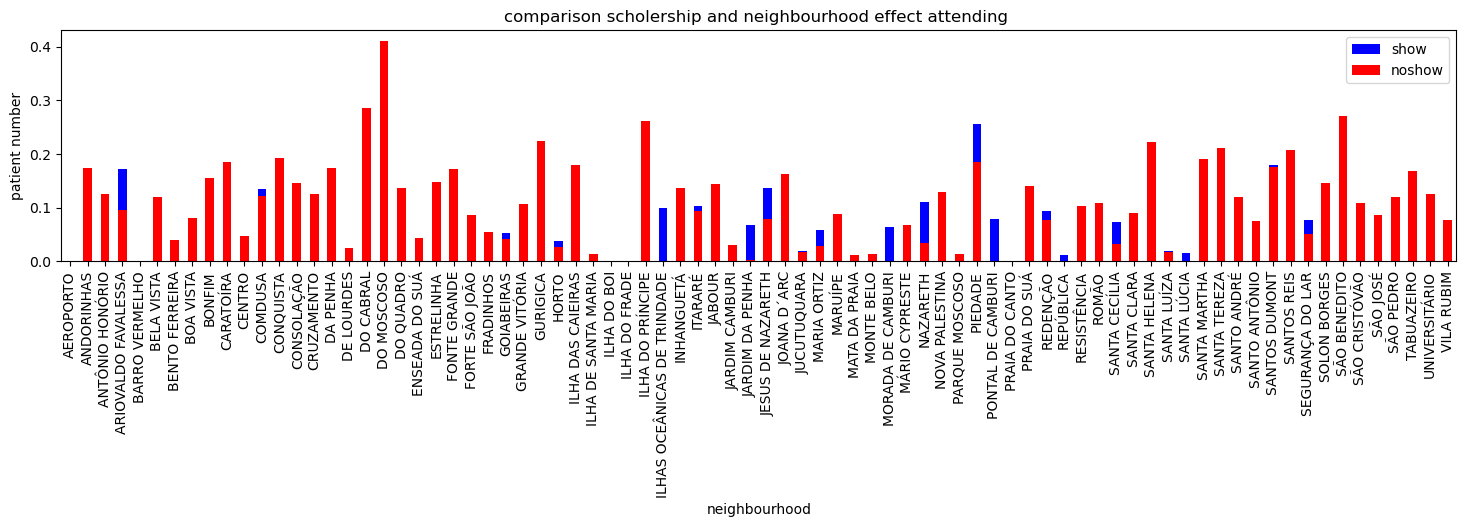

In [20]:
#  does scholership and neightborhood effect attending ?
plt.figure(figsize=[18,3])
df[attend].groupby('neighbourhood').scholarship.mean().plot(kind='bar',color='blue',label='show')
df[no_attend].groupby('neighbourhood').mean().scholarship.plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison scholership and neighbourhood effect attending ')
plt.xlabel('neighbourhood')
plt.ylabel('patient number')

scholership and neightborhood does not effect attending.

<a id='conclusions'></a>
## 4) Conclusions

1- Age is important , younger people attend more than older people so the age affect patient showing up for their scheduled appointment.

2- Number of showing for not received sms  is greater than received , so received sms does not effect attend and we should review sms campain.

3- Neighborhood has an effect on number of people attending.


# - limitations

No clear colleration between showing and gender, deseases and scholarship.It take some time to investigate 
those data,and it is not so important.

it will be good if we can git the the pathients coment on each medical place they went,it will help us to predict if the patient will like to come again or he will be hazetate,and it will help us improve those places.

